In [5]:
## notebook setup
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys
sys.path.append('/homes/sep/haipeng/develop/SWIT-1.0/toolbox-dev/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML
#matplotlib.use('Qt5Agg')   # 'agg'

from base import Model, Source, Receiver, Config
from utils import source_wavelet
from solver import Solver
from tools import loadsu, load_float

In [120]:
work_path = '/scr2/haipeng/SWIT-1.1/00_forward/'   # Working path
mpi_num   = 49                                     # MPI process for fd2dmpi

### model setup
nx,  nz, pml = [481,  141, 20]                     # Grid number along x and z directions, Grid number for PML layers (use a large one)
dx,  dt,  nt = [25, 0.002, 2001]                   # Grid size, time interval, and time step

# velocity and density
vp_true = np.zeros((nx, nz))
vp_init = np.zeros((nx, nz))
rho_true = np.zeros((nx, nz))
rho_init = np.zeros((nx, nz))

# true model
modelpath = '/homes/sep/haipeng/develop/SWIT-1.0/examples/case-01-marmousi2/model/'
# vp_true = np.loadtxt(modelpath + 'Marmousi_481_141_25m.dat')
# rho_true = np.power(vp_true, 0.25) * 310   # density models, (Gardner, 1974)

vp_true = np.ones((nx, nz)) * 4000
rho_true = np.power(vp_true, 0.25) * 310   # density models, (Gardner, 1974)


### sources setup 
f0    = 5.0                                              # Dominant frequency in Hz
amp0  = 1.0                                              # Amplitude of the source wavelet
srcxz = np.loadtxt(modelpath + 'source_coordinate.dat')  # Source coordinates
srcn  = srcxz.shape[0]                                   # Source number along x axis
wavelet  = np.zeros((srcn, nt))                          # Source wavelet

src = source_wavelet(amp0, nt, dt, f0, 'Ricker')

for isrc in range(srcn):
    wavelet[isrc,:] = source_wavelet(amp0, nt, dt, f0, 'ricker')

### receivers setup
temp = np.loadtxt(modelpath + 'receiver_coordinate.dat') # Receiver coordinates
recn = temp.shape[0]                                    # Receiver number
recxz = []                         # Receiver positions
for isrc in range(srcn):
    # nrec = isrc * 10 + 1 
    # recxz_isrc = np.zeros((nrec, 2)) 
    # recxz_isrc[:,0] = temp[0:nrec,0]                          # Receiver x position (m)
    # recxz_isrc[:,1] = temp[0:nrec,1]                          # Receiver z position (m)
    # recxz.append(recxz_isrc) 
    nrec = nx 
    recxz_isrc = np.zeros((nrec, 2)) 
    recxz_isrc[:,0] = temp[0:nrec,0]                          # Receiver x position (m)
    recxz_isrc[:,1] = temp[0:nrec,1]                          # Receiver z position (m)
    recxz.append(recxz_isrc) 

In [121]:
## configuration
config = Config(work_path, mpi_num)

## model
model = Model(nx, nz, dx, dt, nt, pml, vp_true, rho_true)

## source
source = Source(srcxz, wavelet, f0)

## receiver 
receiver = Receiver(recxz, ['p'])

## solver
solver = Solver(config, model, source, receiver)

*****************************************************

    Seismic Waveform Inversion Toolbox: Forward    

*****************************************************

Solver: nt = 2001, dt = 2.0 ms, time = 4.0 s
Solver: nx = 481, nz = 141, dx = 25 m
Solver: x  = 0 ~ 12.0 km
Solver: z  = 0 ~ 3.5 km
Solver: vp = 4000.0 ~ 4000.0 m/s
Solver: Source number = 49
Solver: Receiver component = ['p']
Solver: 24 task in parallel



In [122]:
solver.forward(simu_tag = 'obs', save_snap = False)

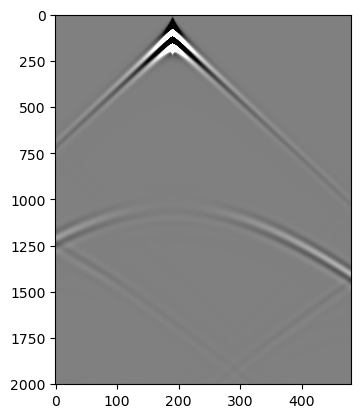

In [125]:
data = '/scr2/haipeng/SWIT-1.1/00_forward/data/obs/src20/sg.bin'
traces = load_float(data).reshape(-1, nt).T
plt.imshow(traces, aspect=0.3, vmin = -0.000001, vmax=0.000001, cmap = 'gray')

In [105]:
traces.shape

(4001, 481)

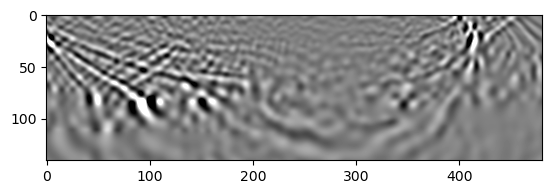

In [67]:
data = '/scr2/haipeng/SWIT-1.1/00_forward/data/obs/src20/pressure2000_snapshot.bin'

traces = load_float(data).reshape(nx, nz).T
plt.imshow(traces, aspect=1, vmin = -0.0001, vmax=0.0001, cmap = 'gray')

In [60]:
data = '/scr2/haipeng/SWIT-1.1/00_forward/data/obs/src20/pressure40_snapshot.bin'

traces = load_float(data)

In [61]:
traces.shape

(67821,)

141.0

In [59]:
nx

481